# 13章 ロバスト制御

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'cm' # math fontの設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.5 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'it'#'regular'
plt.rcParams['axes.xmargin'] = '0'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

plt.rcParams["legend.fancybox"] = True     # 丸角
# plt.rcParams["legend.framealpha"] = 1    # 透明度の指定、0で塗りつぶしなし
# plt.rcParams["legend.edgecolor"] = 'gray' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1.8  # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.4  # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.7 # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1.0   # 点がある場合のmarker scale

In [2]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [3]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':', lw=0.5)
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [4]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':', lw=0.5)
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':', lw=0.5)
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

## ロバスト制御

### 例13.1: 不確かさの記述

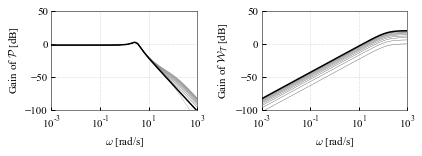

In [5]:
# 垂直駆動アームのノミナルモデル
Pn = tf( [0,8], [1, 2, 10] )
# Pn = tf( [0, 1], [1, 0.1, -2])

# Pn = tf( [0, 1], [1, 1])
# 不確かさ
delta = np.arange(-1, 1 , 0.1)
WT = tf( [10, 0], [1, 150])
# WT = tf([ 1, 0.001], [1, 1000])

fig, ax = plt.subplots(1, 2, figsize=(6,2.3))
# fig, ax = plt.subplots(1, 2)

for i in range(len(delta)):
    # 不確かさをもつ制御対象
    P = (1 + WT*delta[i])*Pn
    gain, _, w = bode(P, logspace(-3,3), plot=False)

    ax[0].semilogx(w, 20*np.log10(gain), color = 'gray', lw = 0.3)
    
    # 乗法的不確かさ
    DT = (P - Pn)/Pn
    gain, _, w = bode(DT, logspace(-3,3), plot=False)

    ax[1].semilogx(w, 20*np.log10(gain), color = 'gray', lw = 0.3)

gain, phase, w = bode(Pn, logspace(-3,3), plot=False)
ax[0].semilogx(w, 20*np.log10(gain), lw =1.5, color='k')

gain, phase, w = bode(WT, logspace(-3,3), plot=False)
ax[1].semilogx(w, 20*np.log10(gain), lw =1.5, color='k')

ax[0].set_ylim(-100, 50)
ax[1].set_ylim(-100, 50)
bodeplot_set(ax)
ax[0].set_xlabel('$\omega$ [rad/s]')
ax[0].set_ylabel('Gain of $\mathcal{P}$ [dB]')
ax[1].set_ylabel('Gain of $\mathcal{W}_\mathcal{T}$ [dB]')
#ax.grid(which="both", ls=':')
#ax.set_ylabel('Gain [dB]')
#ax.set_xlabel('$\omega$ [rad/s]')

fig.tight_layout()
#fig.savefig("robust_plant.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 例13.2: 混合感度問題

K= 
   4.803e+08 s^4 + 7.323e+10 s^3 + 1.84e+11 s^2 + 7.921e+11 s + 3.469e+11
-----------------------------------------------------------------------------
s^5 + 3.614e+08 s^4 + 5.515e+10 s^3 + 1.411e+11 s^2 + 2.657e+10 s + 1.301e+09

gamma = 1.3287755405798092


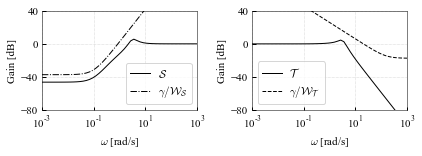

In [7]:
from control import mixsyn

#WS = tf([0, 1000], [1, 0.1])
#WT = tf([1000, 1], [1, 1000])

WS = tf( [0, 1], [1, 0.2, 0.01]) # 感度関数に対する重み関数 
WU = tf(1, 1)
WT = tf( [10, 0], [1, 150]) # 相補感度関数に対する重み関数
# WT2 = tf( [50, 0], [1, 150]) 

# 混合感度問題
K, _, gamma = mixsyn(Pn, w1=WS , w2=WU, w3=WT) 

print('K=', ss2tf(K))
print('gamma =', gamma[0])

fig, ax = plt.subplots(1, 2, figsize=(6,2.3))

# 感度関数
Ssys = feedback(1, Pn*K)
gain, _, w = bode(Ssys, logspace(-3,3), plot=False)
ax[0].semilogx(w, 20*np.log10(gain), ls= '-', lw =1, label='$\mathcal{S}$', color='k')

gain, _, w = bode(gamma[0]/WS, logspace(-3,3), plot=False)
ax[0].semilogx(w, 20*np.log10(gain), ls= '-.', lw =1, label='$\gamma/\mathcal{W}_\mathcal{S}$', color='k')

# 相補感度関数
Tsys = feedback(Pn*K, 1)
gain, _, w = bode(Tsys, logspace(-3,3), plot=False)
ax[1].semilogx(w, 20*np.log10(gain), ls = '-', lw =1, label='$\mathcal{T}$', color='k')

gain, _, w = bode(gamma[0]/WT, logspace(-3,3), plot=False)
ax[1].semilogx(w, 20*np.log10(gain), ls= '--', lw =1, label='$\gamma/\mathcal{W}_\mathcal{T}$', color='k')

for i in range(2):
    ax[i].set_ylim(-80, 40)
    ax[i].set_yticks([-80,-40,0,40])
    ax[i].legend()
    ax[i].grid(which="both", ls=':', lw=0.5)
    ax[i].set_ylabel('Gain [dB]')
    ax[i].set_xlabel('$\omega$ [rad/s]')

fig.tight_layout()
#fig.savefig("robust_design.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

(0.0, 5.0)

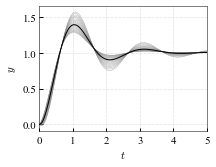

In [8]:
fig, ax = plt.subplots(figsize=(3, 2.3))

for i in range(len(delta)):
    P = (1 + WT*delta[i])*Pn
    Gyr = feedback(P*K, 1)
    
    y, t = step(Gyr, np.arange(0,5,0.01))

    ax.plot(t, y, color ='gray', lw =0.3)

Gyr = feedback(Pn*K, 1)
y, t = step(Gyr, np.arange(0,5,0.01))
ax.plot(t, y, lw =1, color='k')

plot_set(ax, '$t$', '$y$')
ax.set_xlim(0, 5)

#fig.savefig("robust_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

/Users/minami/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/filter_design.py:1621: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


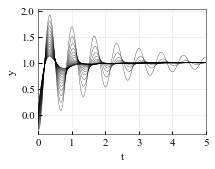

In [13]:
kp = 8
kd = 0.5
ki = 10

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(3,2.3))

for i in range(len(delta)):
    Kpid = tf([kd, kp, ki], [1, 0])
    
    P = (1 + WT*delta[i])*Pn
    Gyr = feedback(P*Kpid, 1)
    y, t = step(Gyr, np.arange(0,5,0.01))
    ax.plot(t, y, color ='k', lw =0.3)
      
ax.set_xlim(0, 5)
plot_set(ax, 't', 'y')

/Users/minami/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/filter_design.py:1621: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


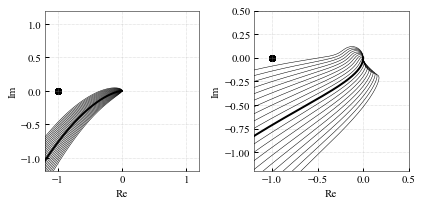

In [14]:
fig, ax = plt.subplots(1,2, figsize=(6, 3))

for i in range(len(delta)):
# ロバスト制御：閉ループ系が安定になる
    
    P = (1 + WT*delta[i])*Pn

    x, y, _ = nyquist(P*K, logspace(-3,5,1000), plot=False)
    ax[0].plot(x, y, lw = 0.5, color='k')
    #ax[0].plot(x, -y, ls='--', color='k')
    ax[0].scatter(-1, 0, color='k')
    plot_set(ax[0], 'Re', 'Im')

# PID制御：閉ループ系が不安定になる
    xpid, ypid, _ = nyquist(P*Kpid, logspace(-3,5,1000), plot=False)
    ax[1].plot(xpid, ypid, lw = 0.5, color='k')
    #ax[1].plot(xpid, -ypid, ls='--', color='k')
    ax[1].scatter(-1, 0, color='k')
    plot_set(ax[1], 'Re', 'Im')

x, y, _ = nyquist(Pn*K, logspace(-3,5,1000), plot=False)
ax[0].plot(x, y, lw = 2, color='k')
ax[0].set_xlim(-1.2, 1.2)
ax[0].set_ylim(-1.2, 1.2)

xpid, ypid, _ = nyquist(Pn*Kpid, logspace(-3,5,1000), plot=False)
ax[1].plot(xpid, ypid, lw = 2, color='k')
ax[1].set_xlim(-1.2, 0.5)
ax[1].set_ylim(-1.2, 0.5)
fig.tight_layout()

# fig.savefig("nyquist_robust.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

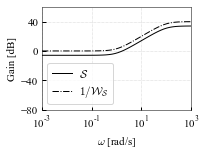

In [9]:
fig, ax = plt.subplots(figsize=(3,2.3))

# 感度関数
Ssys = tf([1.01,1.01],[0.02, 2])
gain, _, w = bode(Ssys, logspace(-3,3), plot=False)
ax.semilogx(w, 20*np.log10(gain), ls= '-', lw =1, label='$\mathcal{S}$', color='k')

WS = tf([0.01, 1],[1, 1])
gain, _, w = bode(1/WS, logspace(-3,3), plot=False)
ax.semilogx(w, 20*np.log10(gain), ls= '-.', lw =1, label='$1/\mathcal{W}_\mathcal{S}$', color='k')


ax.set_ylim(-80, 60)
ax.set_yticks([-80,-40,0,40])
ax.legend()
ax.grid(which="both", ls=':', lw=0.5)
ax.set_ylabel('Gain [dB]')
ax.set_xlabel('$\omega$ [rad/s]')

fig.tight_layout()
#fig.savefig("robust_design.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

0 states have been removed from the model


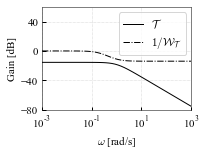

In [18]:
fig, ax = plt.subplots(figsize=(3,2.3))

# 相補感度関数
P = tf(1, [1,1])
Tsys = minreal(P*(1/6))
gain, _, w = bode(Tsys, logspace(-3,3), plot=False)
ax.semilogx(w, 20*np.log10(gain), ls= '-', lw =1, label='$\mathcal{T}$', color='k')

WT = tf([5, 1],[1, 1])
gain, _, w = bode(1/WT, logspace(-3,3), plot=False)
ax.semilogx(w, 20*np.log10(gain), ls= '-.', lw =1, label='$1/\mathcal{W}_\mathcal{T}$', color='k')


ax.set_ylim(-80, 60)
ax.set_yticks([-80,-40,0,40])
ax.legend()
ax.grid(which="both", ls=':', lw=0.5)
ax.set_ylabel('Gain [dB]')
ax.set_xlabel('$\omega$ [rad/s]')

fig.tight_layout()

## 章末問題

章末問題2

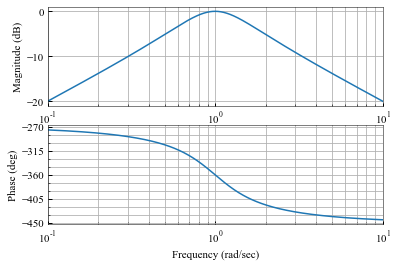

In [18]:
P = tf([1,0],[1, 1, 1])
gain, _, _ = bode(P)

In [19]:
np.max(gain)

0.9999893751148522